In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt

In [68]:
# file4 = 'zillow/City_time_series.csv'
# raw4_df = pd.read_csv(file4)
# raw4_df.count() 3.76 million rows by 81 cols
# could not perform last operation

In [69]:
file5 = 'zillow/State_time_series.csv'
raw5_df = pd.read_csv(file5)
state_df = raw5_df.copy()
# group by state and return all time mean
statesall_mean = state_df.groupby(['RegionName'])['ZHVI_AllHomes'].mean()

# Avg Home Price of each State 
 [] a brief intro for state vs avg home price analysis before time series analysis on next section
 [] calculate average of total home prices per state and show on y_axis
 [] scatter final average number with states on x_axis

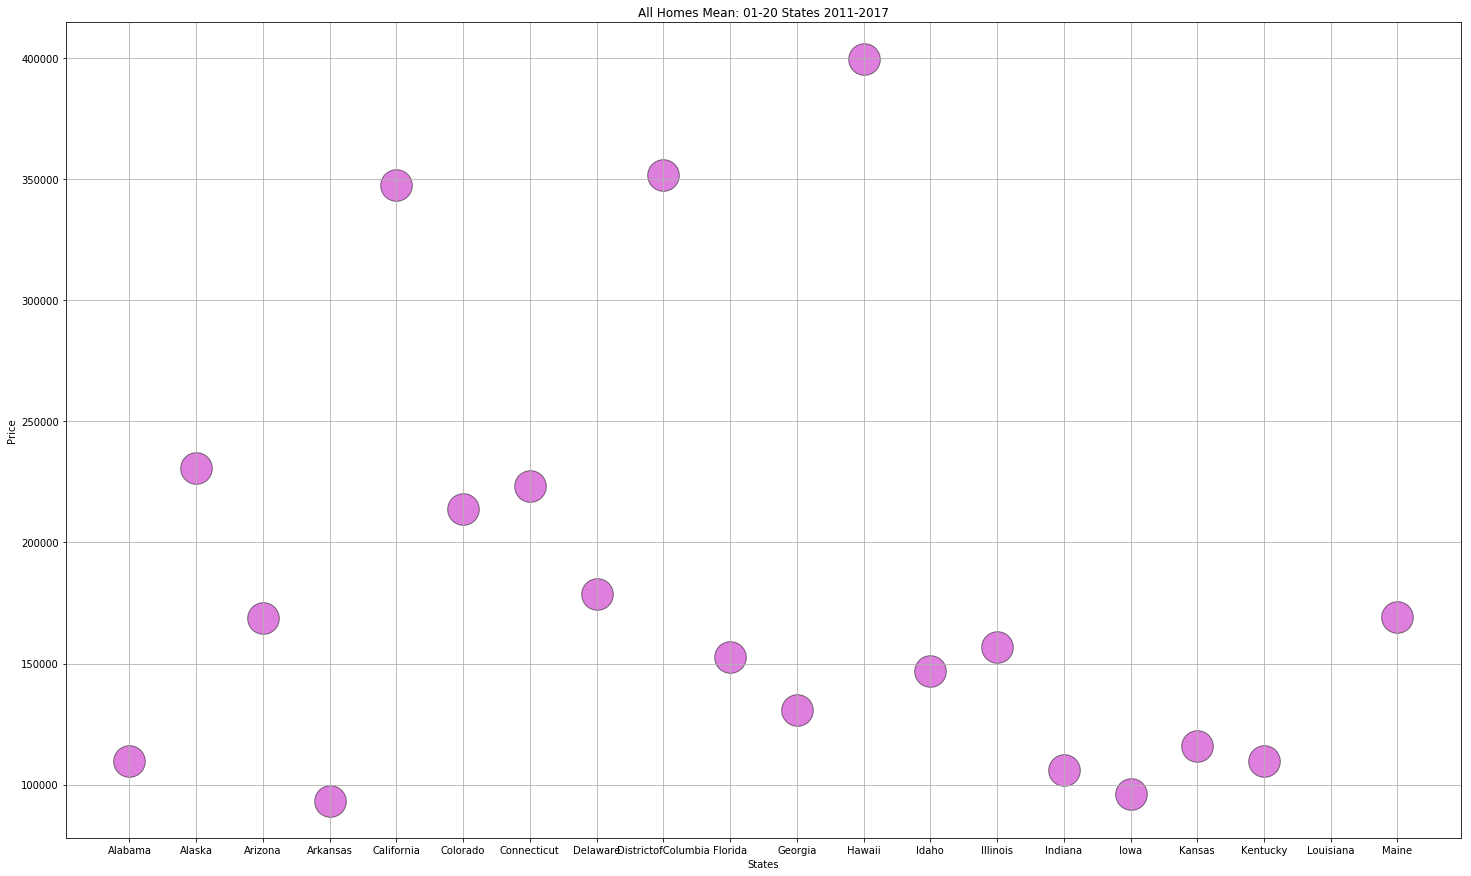

In [70]:
# scatter plot states 0-20 
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 01-20 States, All Years Final")
plt.scatter(statesall_mean.index[:20], statesall_mean[:20],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

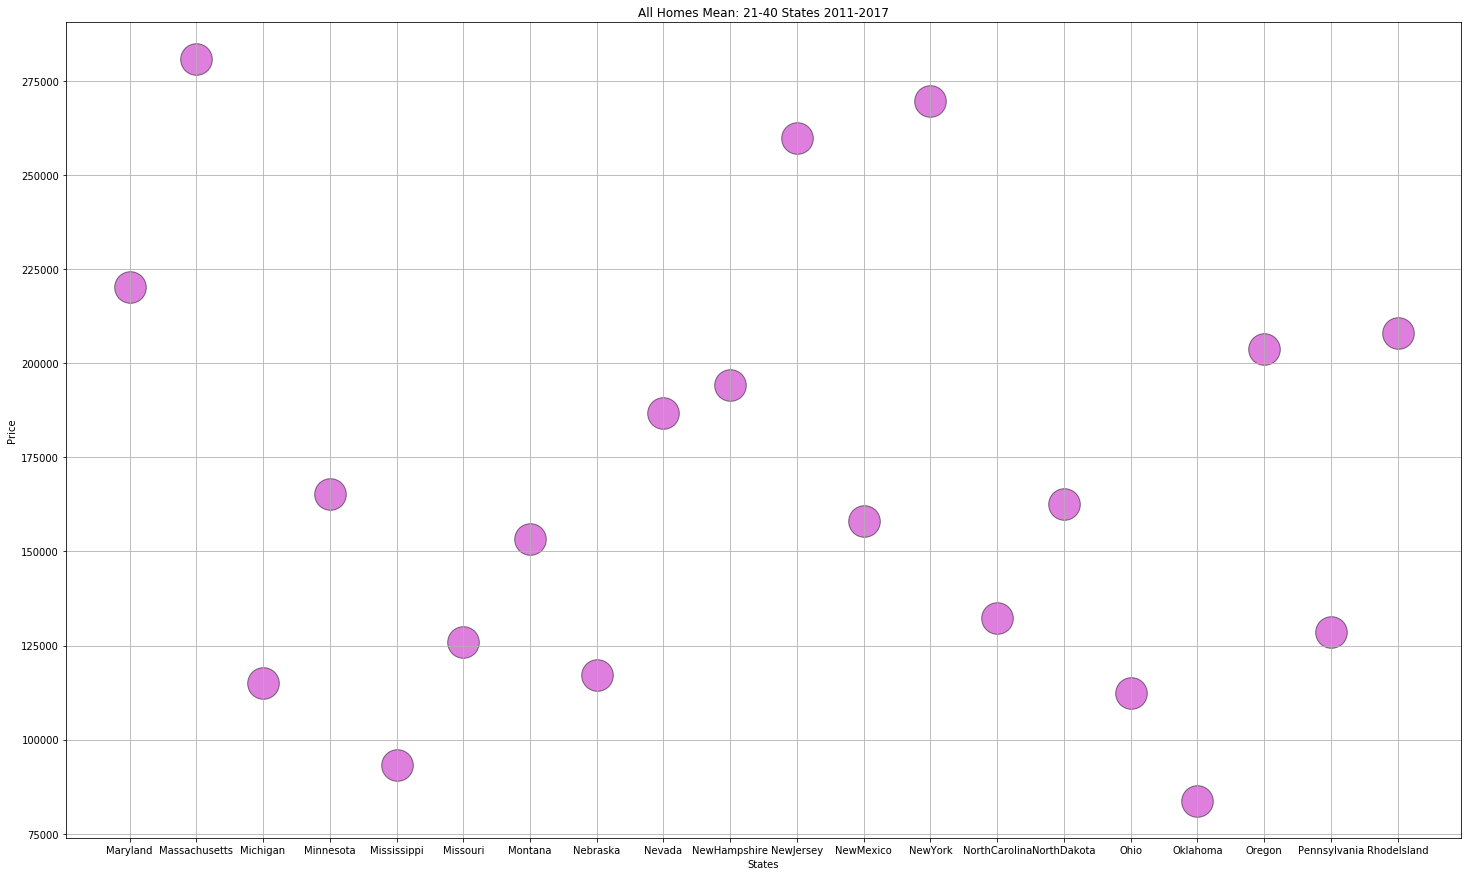

In [71]:
# scatter plot states 21-40
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 21-40 States 2011-2017")
plt.scatter(statesall_mean.index[20:40], statesall_mean[20:40],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

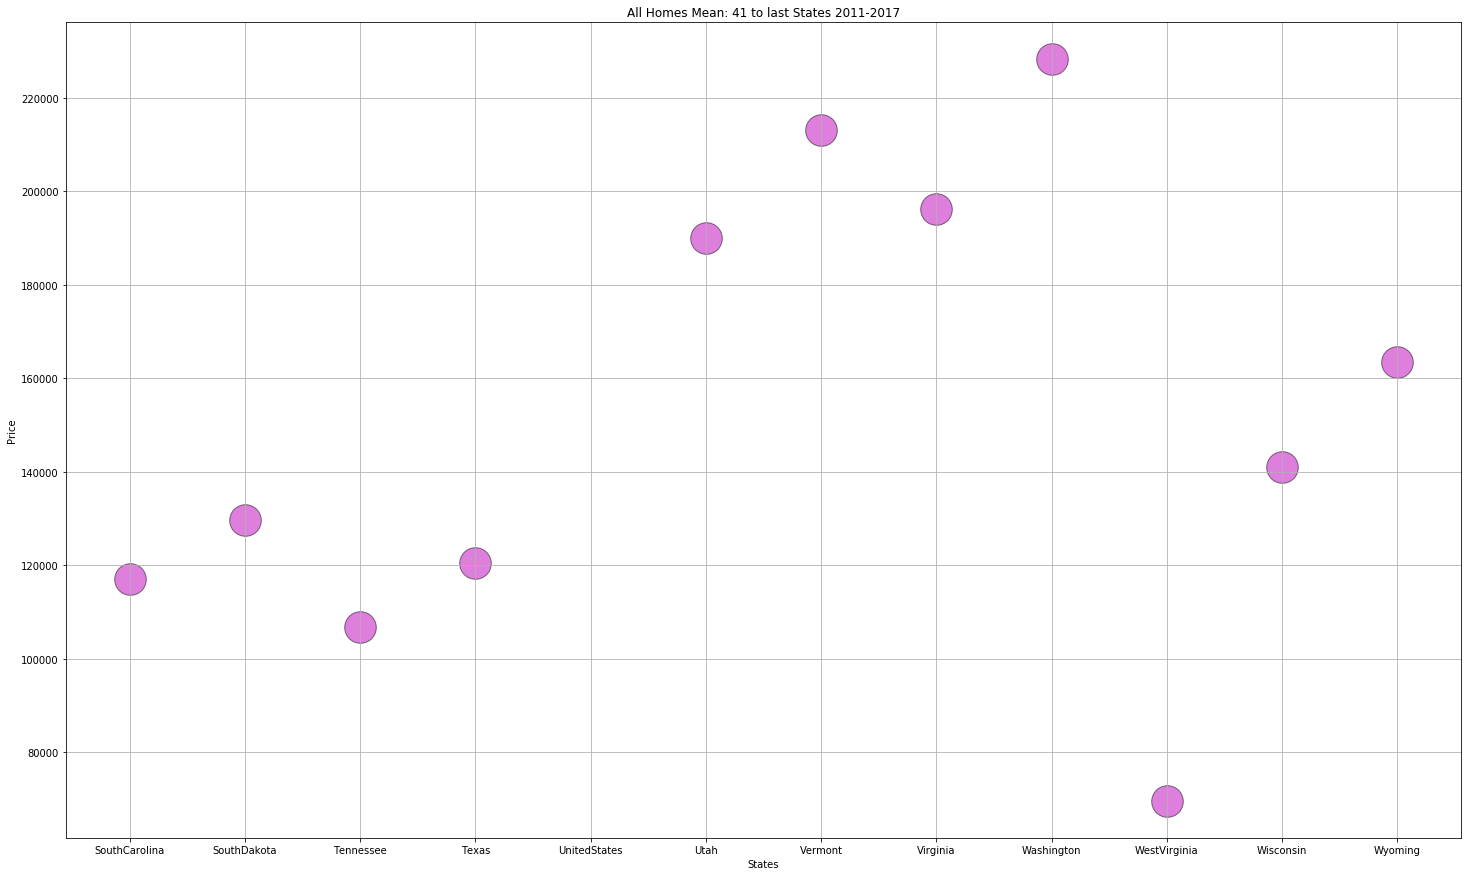

In [189]:
# scatter plot states 41-
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.xlabel("States")
plt.ylabel("Price")
plt.title("All Homes Mean: 41 to last States 2011-2017")
plt.scatter(statesall_mean.index[40:], statesall_mean[40:],color='m', alpha=0.50, edgecolor = 'black', s=1000)
plt.show()

# Data Visualization with Time Series Approach
     [] convert date (ie. 1996-04-30) to a date time format so target time period could be extracted
     [] extreme volatility on months not preferred thus analysis will be limited to years as per time period
     [] crucial library import datetime as dt

In [190]:
# Year needs to be extracted in order to determine increase per year
# state_df['Date'].head()
state_df['dt_Date'] = pd.to_datetime(state_df['Date'])
# state_df['dt_Date'].count() 13212
state_df['Year'] = state_df['dt_Date'].dt.year
# state_df['Year'] will be required for next groupby object

# state_df['Year'].unique()
# array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
#        2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]

# state_df.groupby(['RegionName', 'Year'])['ZHVI_AllHomes'].mean() returns an array
dummyst = state_df.groupby(['RegionName', 'Year'])['ZHVI_AllHomes'].mean()
stateMeanYear_df = dummyst.reset_index()
stateMeanYear_df
# pivoted the table with years on index, states on columns and average home price as values
stateMeanYear_pdf = stateMeanYear_df.pivot(index='Year', columns = 'RegionName', values = 'ZHVI_AllHomes')
stateMeanYear_pdf

RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DistrictofColumbia,Florida,...,Tennessee,Texas,UnitedStates,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1996,79866.666667,NaN,104633.333333,64355.555556,157322.222222,129500.000000,132900.000000,108511.111111,NaN,86577.777778,...,71577.777778,NaN,NaN,128577.777778,NaN,112666.666667,135444.444444,39866.666667,NaN,NaN
1997,81358.333333,NaN,108308.333333,66833.333333,161108.333333,135083.333333,136050.000000,110466.666667,NaN,88908.333333,...,75366.666667,83254.545455,NaN,136891.666667,NaN,114633.333333,141700.000000,40833.333333,100900.000000,NaN
1998,84950.000000,175466.666667,113850.000000,69150.000000,172341.666667,142775.000000,141525.000000,113791.666667,NaN,92833.333333,...,80933.333333,86433.333333,NaN,142483.333333,NaN,117650.000000,150558.333333,43800.000000,104900.000000,99277.777778
1999,89475.000000,171400.000000,118933.333333,70075.000000,188500.000000,155775.000000,150075.000000,117200.000000,130114.285714,97658.333333,...,84633.333333,91733.333333,NaN,148733.333333,NaN,122183.333333,159308.333333,46391.666667,111566.666667,102333.333333
2000,91941.666667,174025.000000,127208.333333,72400.000000,215966.666667,174233.333333,163558.333333,124816.666667,144600.000000,105441.666667,...,87491.666667,95725.000000,NaN,157333.333333,NaN,129950.000000,168591.666667,48100.000000,116650.000000,109125.000000
2001,94416.666667,177375.000000,133191.666667,75600.000000,246400.000000,192341.666667,178516.666667,132100.000000,160516.666667,115341.666667,...,90458.333333,98808.333333,NaN,163075.000000,NaN,140033.333333,176533.333333,49575.000000,123833.333333,118100.000000
2002,96916.666667,181341.666667,140066.666667,77408.333333,280541.666667,201633.333333,199125.000000,143558.333333,200991.666667,127633.333333,...,92708.333333,102783.333333,NaN,165258.333333,NaN,152816.666667,184433.333333,51116.666667,129625.000000,123200.000000
2003,99858.333333,191516.666667,149425.000000,82000.000000,331108.333333,206975.000000,224916.666667,160091.666667,251116.666667,142716.666667,...,96500.000000,106958.333333,NaN,164841.666667,183375.000000,169416.666667,194700.000000,53916.666667,137375.000000,129966.666667
2004,105641.666667,208358.333333,165558.333333,87516.666667,410508.333333,212458.333333,251708.333333,179391.666667,309308.333333,166800.000000,...,100908.333333,115183.333333,NaN,167666.666667,204491.666667,198166.666667,212841.666667,56216.666667,142983.333333,142508.333333


# Avg Home Prices over Years per State
    [] draw a continuous line plot to show price change over the years of data
    [] plot average home price for each state by iteration through columns on same chart with legend
    [] divide states into four and show in four different figures for easy read    

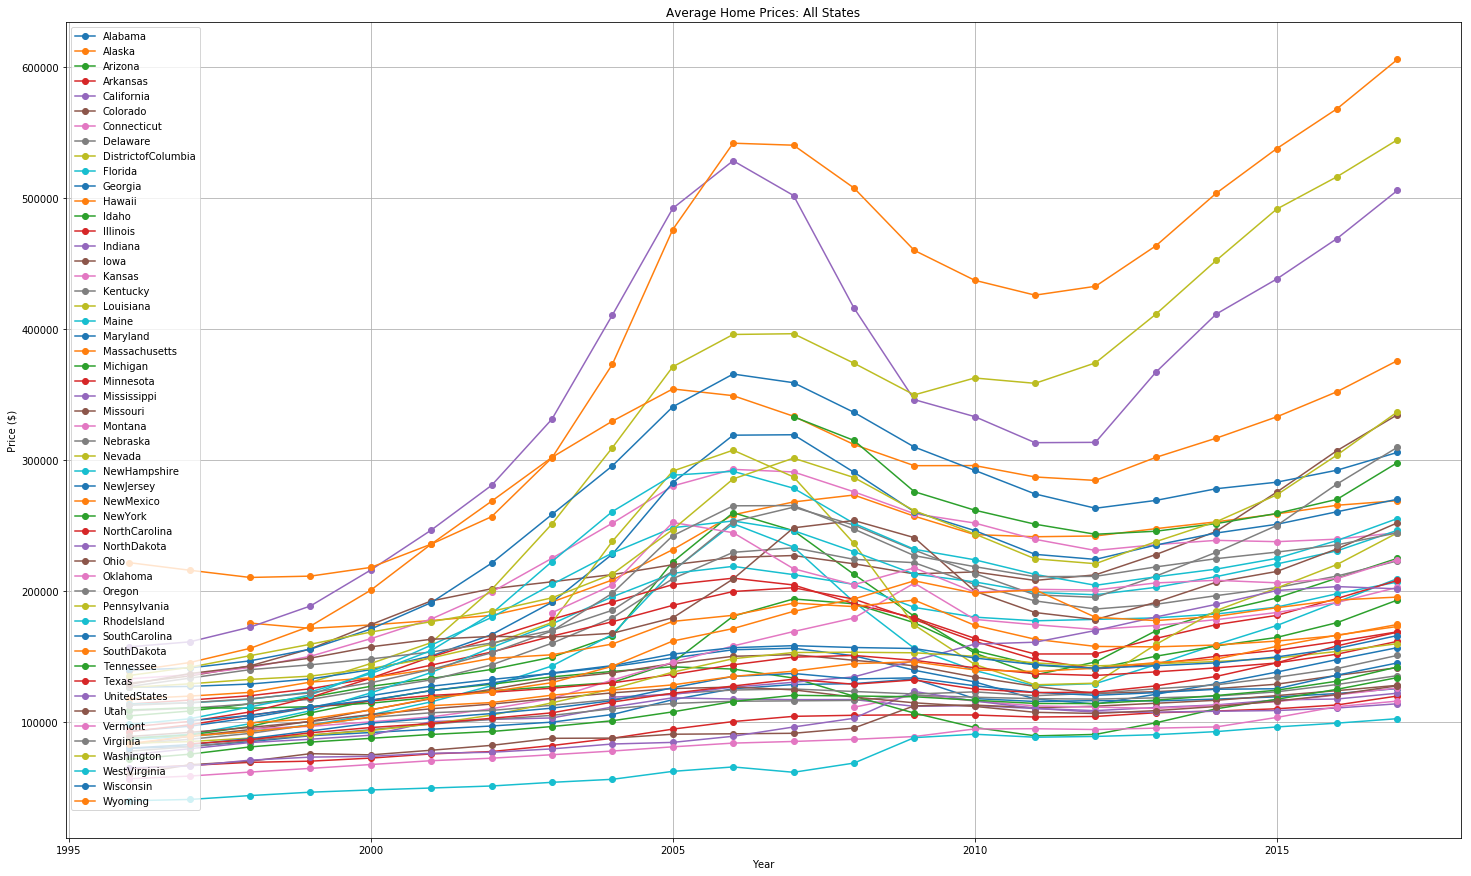

In [89]:
# pre-styling plot
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: All States")
plt.xlabel("Year")
plt.ylabel(" Price ($) ")

for state in stateMeanYear_pdf.columns:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], marker = 'o',label=state)
        plt.legend(loc='best')
plt.show()

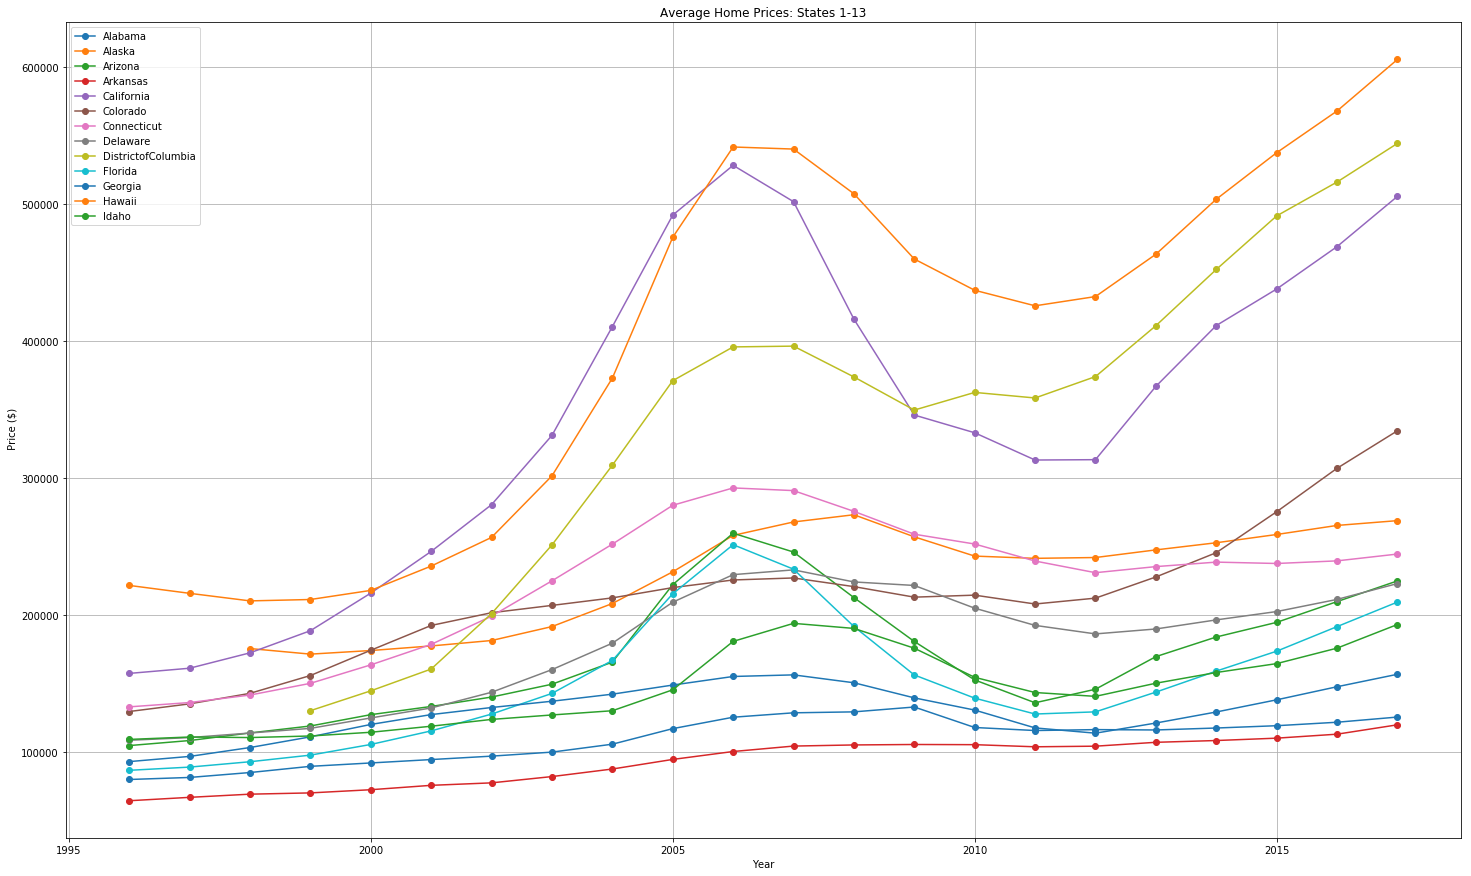

In [90]:
quarter_states = int(len(stateMeanYear_pdf.columns)/4)

plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 1-13")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[:quarter_states]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], marker = 'o',label=state)
        plt.legend(loc='best')
plt.show()

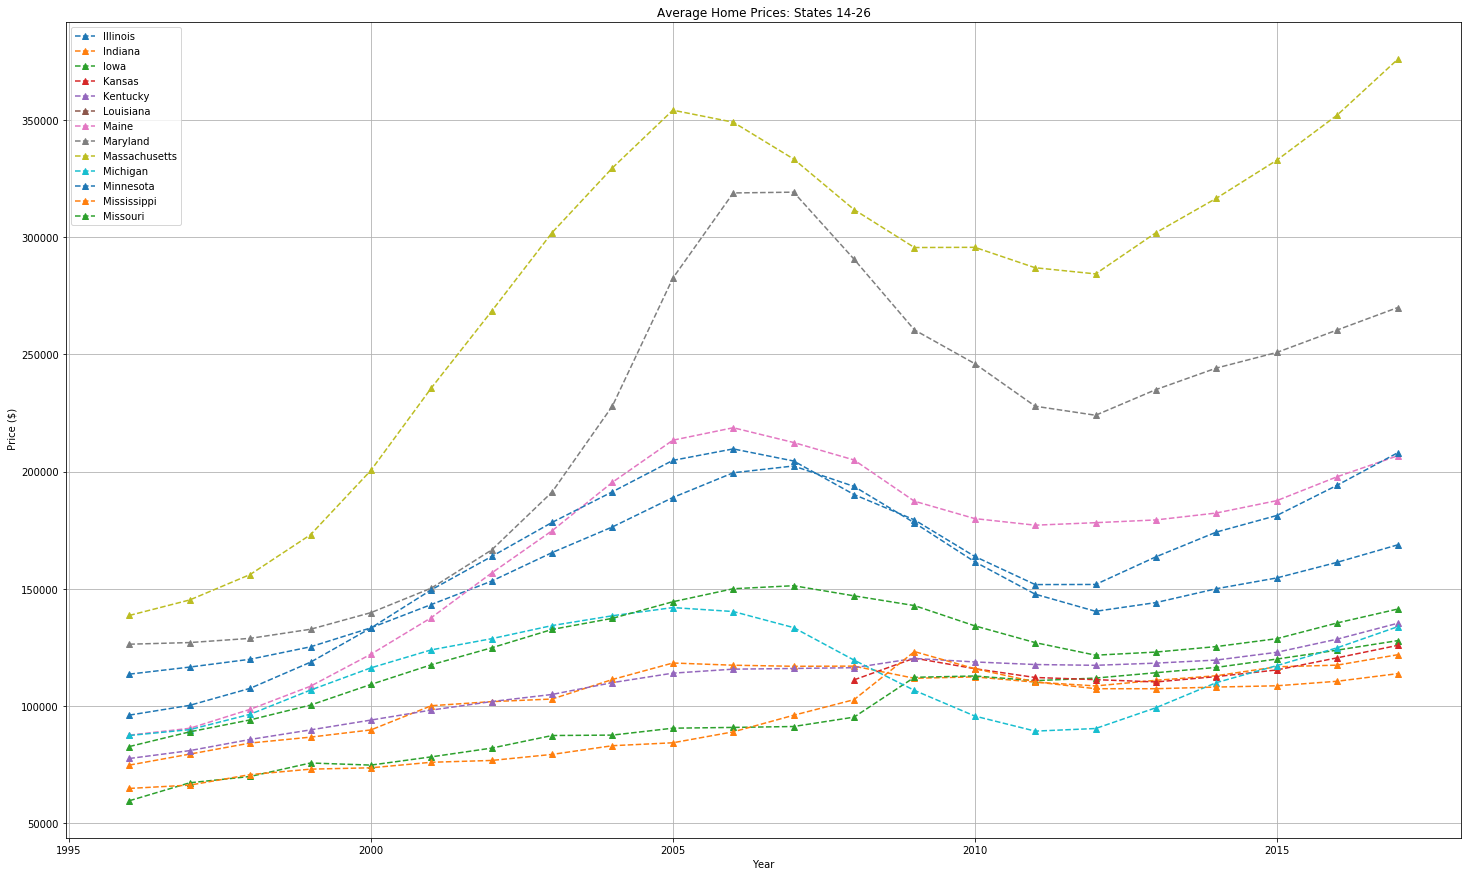

In [91]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 14-26")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[quarter_states:(quarter_states*2)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state],linestyle='--', marker = '^',label=state)
        plt.legend(loc='best')
plt.show()


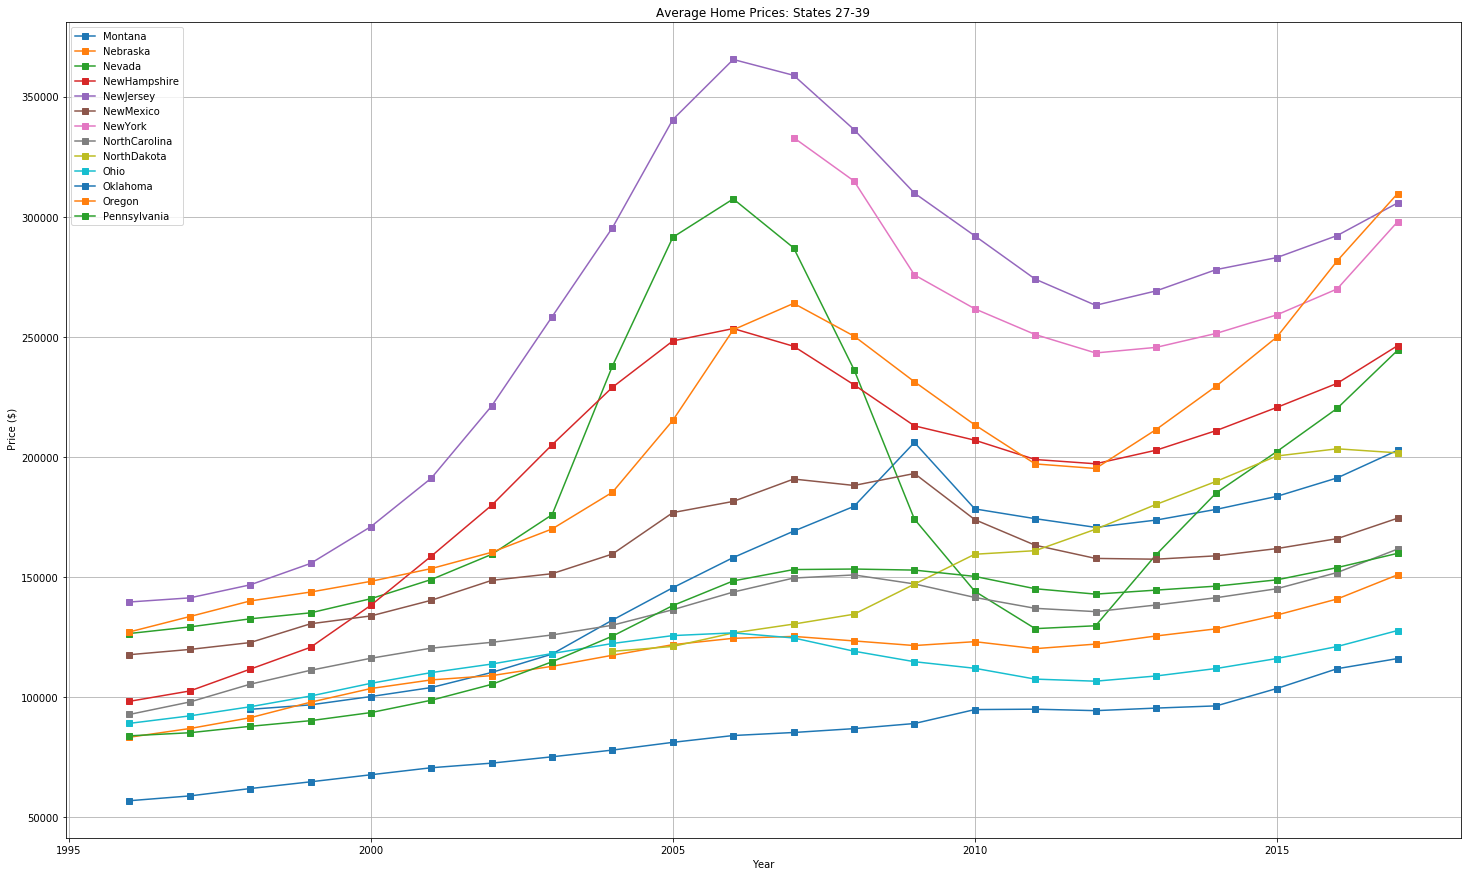

In [92]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 27-39")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[(2*quarter_states):(quarter_states*3)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], linestyle='-', marker = 's',label=state)
        plt.legend(loc='best')
plt.show()

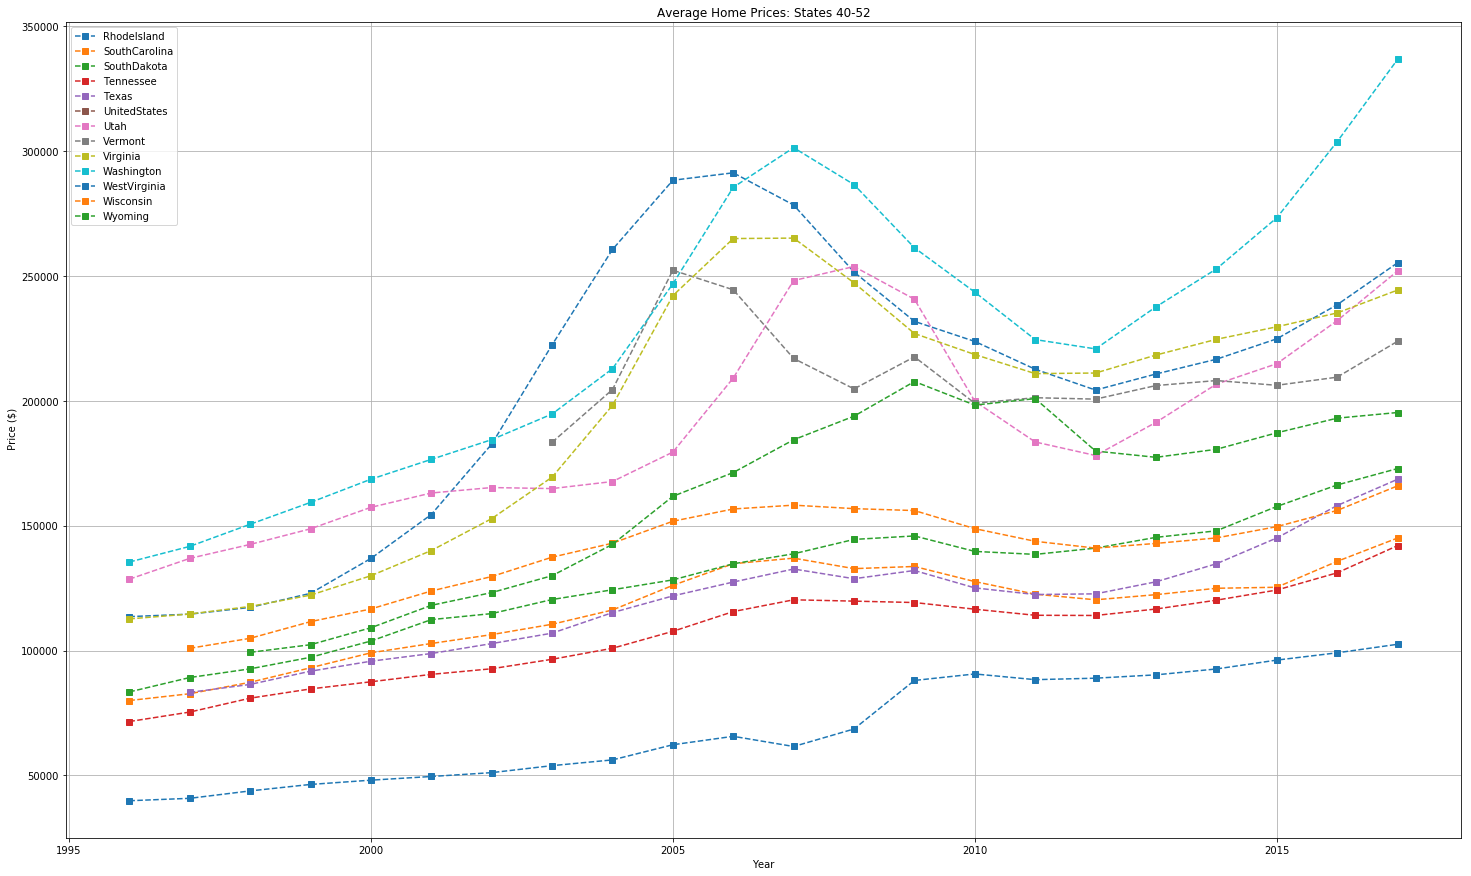

In [95]:
plt.figure(figsize=(25,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: States 40-52")
plt.xlabel("Year")
plt.ylabel(" Price ($)")

for state in stateMeanYear_pdf.columns[(3*quarter_states):(quarter_states*4)]:
        plt.plot(stateMeanYear_pdf.index, stateMeanYear_pdf[state], linestyle='--', marker = 's',label=state)
        plt.legend(loc='best')
plt.show()

In [96]:
# type(stateMeanYear_pdf.mean().sort_values(ascending=False)) returns series
stateavgsorted_list = stateMeanYear_pdf.mean().sort_values(ascending=False)
stateavgsorted_listTT = stateavgsorted_list[:11]
stateavgsorted_listTTindex = stateavgsorted_listTT.index[:11]
stateavgsorted_listTTindex
# stateavgsorted_listTT

Index(['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts',
       'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut',
       'Maryland', 'Colorado'],
      dtype='object', name='RegionName')

In [ ]:
# Home

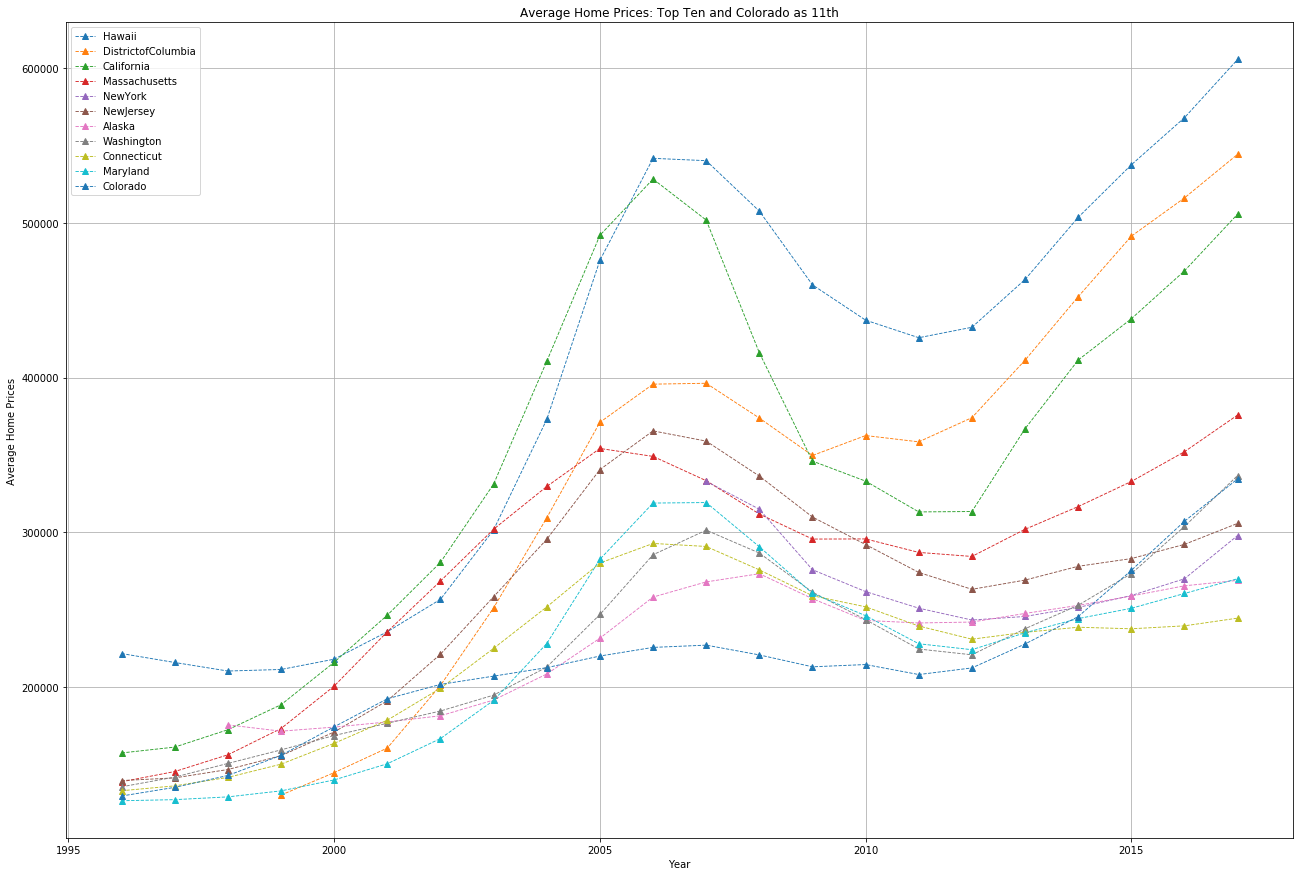

In [186]:
# pre-styling plot
plt.figure(figsize=(22,15))
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.title("Average Home Prices: Top Ten and Colorado as 11th")
plt.xlabel("Year")
plt.ylabel(" Average Home Prices ")

stateMeanYear_TTpdf =stateMeanYear_pdf[['Hawaii', 'DistrictofColumbia', 'California', 'Massachusetts', 'NewYork', 'NewJersey', 'Alaska', 'Washington', 'Connecticut', 'Maryland', 'Colorado']]
for state in stateMeanYear_TTpdf.columns:
    plt.plot(stateMeanYear_TTpdf.index, stateMeanYear_TTpdf[state], linewidth = 0.9,linestyle ='--', marker = '^',label=state)
    plt.legend(loc='best')
plt.show()

# Rate Comparison of States
    [] copy prices_df and transform into a dataframe consisting of rates for change with respect to last years prices
    [] create a bar chart with top ten states with highest home price increase (mean) over the years of data span

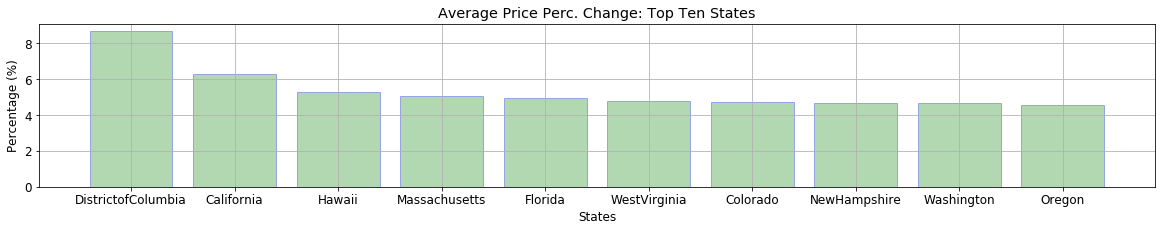

In [185]:
stateperc_df = stateMeanYear_pdf.pct_change()
stateperc_list = stateperc_df.mean()

# plot top ten staets with highest all-time increase
stateperc_TTlist = stateperc_list.sort_values(ascending=False)[:10]
stateperc_TTlist=stateperc_TTlist*100
# pre-styling scatter plot
plt.figure(figsize=(20,3))
plt.rcParams["font.size"] = 12
plt.grid()
plt.title("Average Price Perc. Change: Top Ten States")
plt.xlabel("States")
plt.ylabel("Percentage (%)")
plt.bar(stateperc_TTlist.index,stateperc_TTlist, color = 'g', edgecolor = 'b' , alpha = 0.3)
plt.show()

# Data Visualization Cont'd: Colorado vs Overall
    [] create a bar chart with line plot for Colorado vs Overall Avg in home percentage price change
    [] define a function for similar analysis in below sections of the team project (ie. median, rental etc.)
    [] parameters required for above function: 
        - pivoted_Tdf: a pivoted dataframe with states placed on columns and years on index then transpose
        - state: a state (column) to be compared to overall average
        - ylabel:  a field whose values will be used for comparison, mostly dollar amount (ie. price, rent, fee etc.)

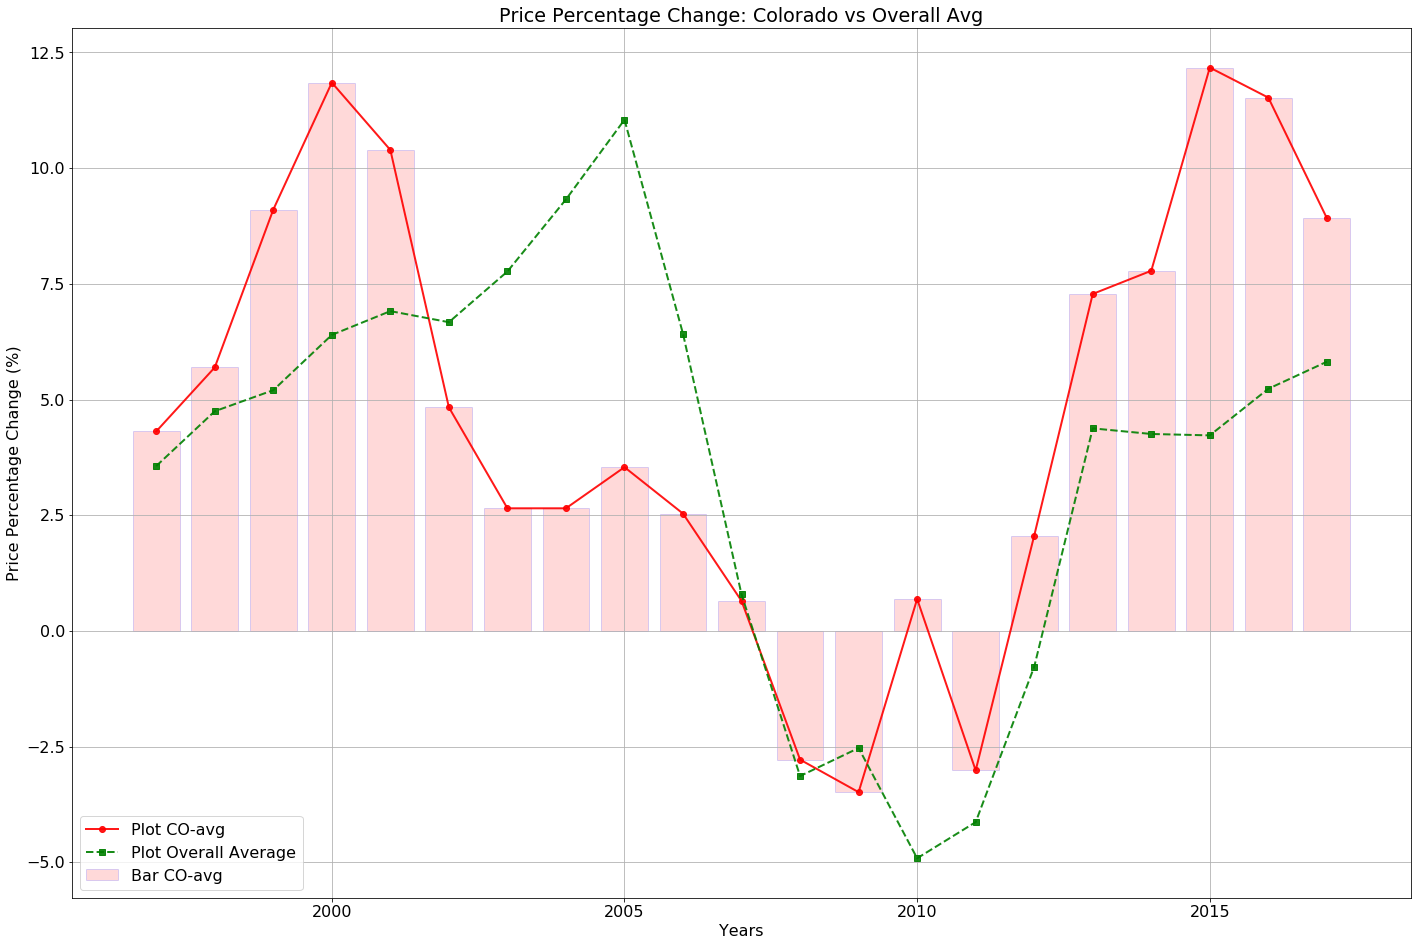

In [266]:
plt.figure(figsize=(24,16))
plt.rcParams["font.size"] = 16
plt.grid()
plt.title("Price Percentage Change: Colorado vs Overall Avg")
plt.xlabel("Years")
plt.ylabel("Price Percentage Change (%)")
plt.bar(stateperc_df.index,stateperc_df['Colorado']*100, color = 'r', edgecolor = 'b' , alpha = 0.15, align='center', label='Bar CO-avg')
plt.plot(stateperc_df.index,stateperc_df['Colorado']*100, color = 'r', linewidth= 2,   marker = 'o', alpha = 0.90, label='Plot CO-avg')
plt.plot(stateperc_df.index,stateperc_df.mean(axis=1)*100, color = 'g', linewidth= 2,linestyle='--', marker = 's', alpha = 0.90, label='Plot Overall Average')
plt.legend(loc='best')
plt.show()

        [] define function after accurate results from above

In [257]:
def BarLine_vsAvg_onYears(pivoted_Tdf,state,ylabel):
    plt.figure(figsize=(24,16))
    plt.rcParams["font.size"] = 16
    plt.grid()
    plt.title(state + " vs Overall Average")
    plt.xlabel('Years')
    plt.ylabel(ylabel)
    plt.bar(pivoted_Tdf.index,pivoted_Tdf[state], color = 'c',  alpha = 0.35, align='center', label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf[state], color = 'b', linewidth= 1,   marker = 'o', alpha = 0.90, label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1), color = 'g', linewidth= 2, linestyle ='--', marker = 's', alpha = 0.90, label='Overall Avg')
    plt.legend(loc='best')
    plt.show()

        [] modify above function for percentage output when comparing rates

In [258]:
def BarLine_vsAvg_onYears_Perc(pivoted_Tdf,state,ylabel):
    plt.figure(figsize=(24,16))
    plt.rcParams["font.size"] = 16
    plt.grid()
    plt.title(state + " vs Overall Average")
    plt.xlabel('Years')
    plt.ylabel(ylabel)
    plt.bar(pivoted_Tdf.index,pivoted_Tdf[state]*100, color = 'r',  alpha = 0.15, align='center', label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf[state]*100, color = 'r', linewidth= 2,   marker = 'o', alpha = 0.90, label=state)
    plt.plot(pivoted_Tdf.index,pivoted_Tdf.mean(axis=1)*100, color = 'g', linewidth= 2, linestyle ='--', marker = 's', alpha = 0.90, label='Overall Avg')
    plt.legend(loc='best')
    plt.show()

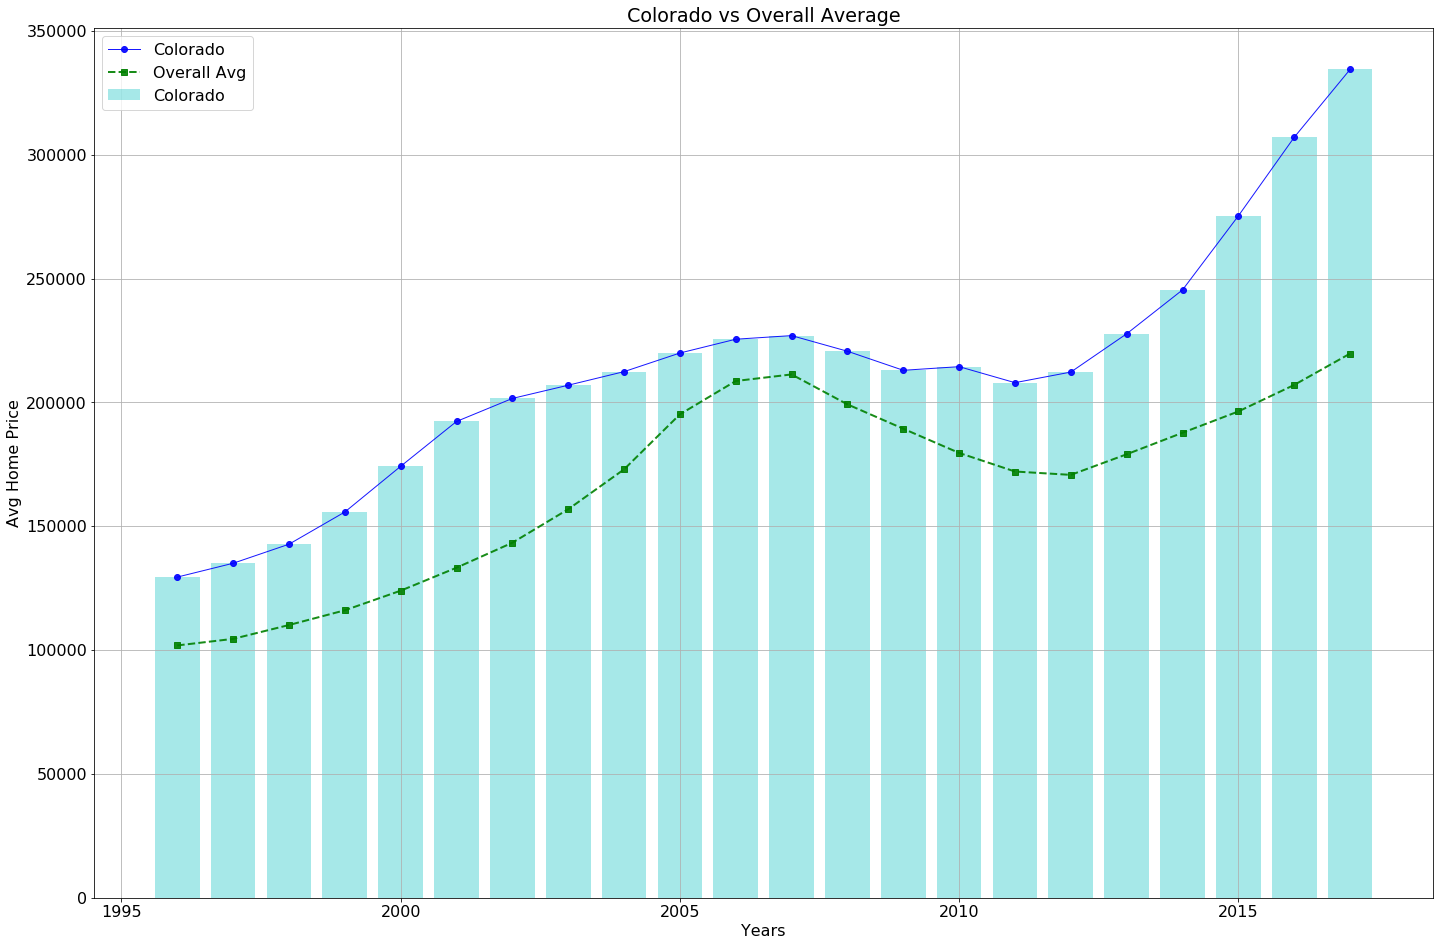

In [262]:
# test function with below states
# BarLine_vsAvg_onYears_Perc(pivoted_Tdf=stateperc_df,state='Utah',ylabel='Price Perc Rate')
BarLine_vsAvg_onYears(pivoted_Tdf=stateMeanYear_pdf,state='Colorado',ylabel='Avg Home Price')

# How about rent ?
        [] create all required parameters to run a function thus state (CO) vs Overall comparison could be made:
            (1) pivotedT_df (2)state (3) ylabel -values-

In [282]:
# narrowing down our scope on extracted fields/columns below
rental_df = state_df[['RegionName','MedianRentalPrice_AllHomes','Year']]
# pivoting dataframe
rentalpivoted_Tdf = rental_df.groupby(['Year','RegionName'])['MedianRentalPrice_AllHomes'].mean().reset_index().pivot(index='Year', columns = 'RegionName', values = 'MedianRentalPrice_AllHomes')
rentalpivoted_Tdf.head()
# drop all those array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,2007, 2008, 2009, 2010]
# all NaN


RegionName,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,DistrictofColumbia,Florida,...,Tennessee,Texas,UnitedStates,Utah,Vermont,Virginia,Washington,WestVirginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
BarLine_vsAvg_onYears_Perc(pivoted_Tdf=stateperc_df,state='Utah',ylabel='Price Perc Rate')
BarLine_vsAvg_onYears(pivoted_Tdf=stateMeanYear_pdf,state='Colorado',ylabel='Avg Home Price')